In [58]:
%load_ext autoreload
%autoreload 2
import cf_ownership as cfo
import counterfeit_utils as cfu
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#Only run on Cersei with DB access
# top_slugs = cfu.get_top_slugs(cfu.CUT_OFF,cfu.DB_NAME)
# der_lists = cfu.der_list_from_db()


# with open(f'top_owner_dfs/top_slugs.pkl','wb') as f:
#     pickle.dump(top_slugs,f)
# with open(f'top_owner_dfs/der_lists.pkl','wb') as f:
#     pickle.dump(der_lists,f)



In [59]:
with open(f'top_owner_dfs/lists/top_slugs.pkl','rb') as f:
    top_slugs = pickle.load(f)
with open(f'top_owner_dfs/lists/der_lists.pkl','rb') as f:
    der_lists = pickle.load(f)
ders = ['beanzofficial','lilpudgys','moonbirds-oddities','mutant-ape-yacht-club','official-v1-punks','remilio-babies','world-of-women-galaxy']
with open(f'top_owner_dfs/lists/look_sims_dict.pkl','rb') as f:
    look_sims_dict = pickle.load(f)

In [15]:
# Path to the directory containing your pickled dataframes
folder_path = 'top_owner_dfs/'

all_dfs = []

# Loop through all files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):
        
        file_path = os.path.join(folder_path, filename)
        
        # Load the dataframe from the pickle file
        df = pd.read_pickle(file_path)
        
        # Append it to the list of dataframes
        all_dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)
#drop exact duplicate rows
combined_df.drop_duplicates(subset=['slug','address','token_id'],inplace=True)
# Now you can do whatever you like with combined_df
print(combined_df.head())

               slug                                     address token_id
0  asm-aifa-genesis  0x000000000000000000000000000000000000dEaD     4119
1  asm-aifa-genesis  0x000000000000000000000000000000000000dEaD     4120
2  asm-aifa-genesis  0x000000000000000000000000000000000000dEaD     4121
3  asm-aifa-genesis  0x000000000000000000000000000000000000dEaD     4122
4  asm-aifa-genesis  0x000000000000000000000000000000000000dEaD     4123


  0%|          | 0/54 [00:00<?, ?it/s]

100%|██████████| 54/54 [00:07<00:00,  7.21it/s]


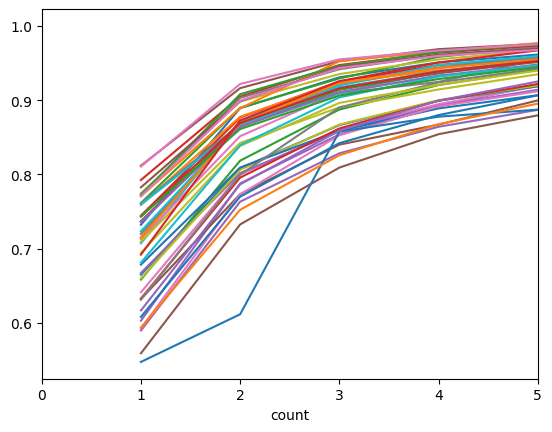

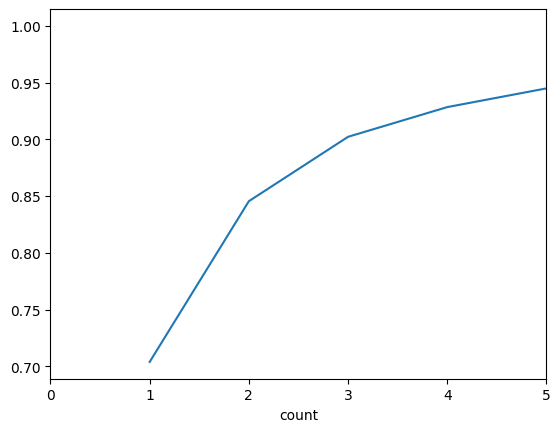

{'0n1-force': 0.7320652173913044, '3landers': 0.7154598825831703, 'alienfrensnft': 0.7613749584855529, 'azuki': 0.7444848484848485, 'bears-deluxe': 0.6028075970272502, 'boredapeyachtclub': 0.8116823290952644, 'chain-runners-nft': 0.6410967344423907, 'clonex': 0.7198208519945839, 'cool-cats-nft': 0.7744131876007884, 'coolmans-universe': 0.7071329227101133, 'cryptodickbutts-s3': 0.6648706896551724, 'cryptopunks': 0.7588711930706902, 'degentoonz-collection': 0.6582004863550391, 'doodles-official': 0.7923812962628634, 'forgottenruneswizardscult': 0.6672056921086675, 'genuine-undead': 0.6320719370550768, 'goblintownwtf': 0.712912388027092, 'guttercatgang': 0.7607361963190185, 'hashmasks': 0.6599539700805523, 'kaiju-kingz': 0.7593097184377838, 'kanpai-pandas': 0.6783994071878473, 'karafuru': 0.7706722189173111, 'killergf': 0.736562001064396, 'kiwami-genesis': 0.6325609389106229, 'kprverse': 0.5895522388059702, 'livesofasuna': 0.7368297271872061, 'metahero-generative': 0.5923670320747056, 'mf

In [41]:
#How many premuims does each wallet own? Same collection
tot_val_counts = []
prob_dict = {}
for top_slug in tqdm(top_slugs):
    if top_slug in ders:
        continue
    df_slugged = combined_df.query('slug == @top_slug')
    val_counts = df_slugged['address'].value_counts()
    tot_val_counts.append(val_counts)
    #plot cdf of val counts
    cdf = val_counts.value_counts(normalize=True).sort_index().cumsum()
    cdf.plot()
    prob_dict[top_slug] = cdf = val_counts.value_counts(normalize=True).sort_index().cumsum()[1]
    plt.xlim(0,5)
plt.show()
#make total cdf
tot_val_counts = pd.concat(tot_val_counts)
tot_cdf = tot_val_counts.value_counts(normalize=True).sort_index().cumsum()
tot_cdf.plot()
plt.xlim(0,5)
plt.show()
print(prob_dict)



(0.0, 3.0)

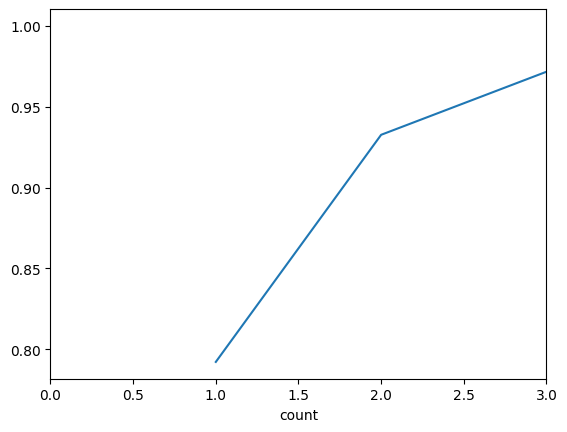

In [33]:
#How many different premiums does each wallet own? Diff collection
df_slugged = combined_df.query('slug in @top_slugs and slug not in @ders')
df_slugged = df_slugged.drop_duplicates(subset=['slug','address'])
val_counts = df_slugged['address'].value_counts()
#plot cdf of val counts
cdf = val_counts.value_counts(normalize=True).sort_index().cumsum()
cdf.plot()
plt.xlim(0,3)

  0%|          | 0/54 [00:00<?, ?it/s]

  7%|▋         | 4/54 [00:03<00:40,  1.23it/s]

beanzofficial


 28%|██▊       | 15/54 [00:10<00:29,  1.32it/s]

forgottenruneswizardscult


 48%|████▊     | 26/54 [00:18<00:21,  1.30it/s]

lilpudgys


 57%|█████▋    | 31/54 [00:21<00:15,  1.45it/s]

moonbirds-oddities


 61%|██████    | 33/54 [00:22<00:12,  1.73it/s]

mutant-ape-yacht-club


 65%|██████▍   | 35/54 [00:23<00:09,  1.94it/s]

official-v1-punks


 76%|███████▌  | 41/54 [00:27<00:08,  1.49it/s]

remilio-babies


 96%|█████████▋| 52/54 [00:34<00:01,  1.28it/s]

world-of-women-galaxy


100%|██████████| 54/54 [00:35<00:00,  1.52it/s]


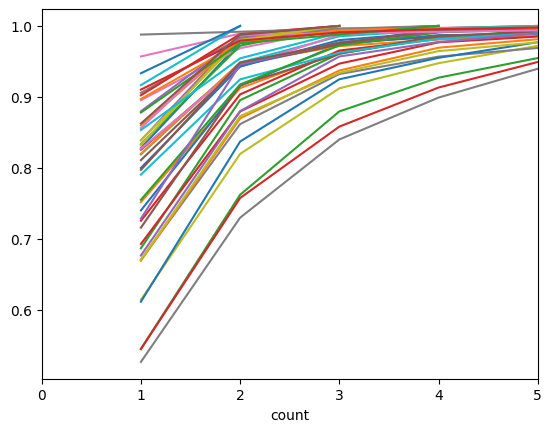

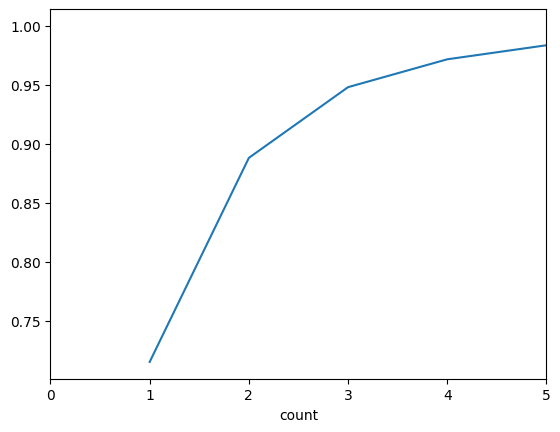

{'0n1-force': 0.828125, '3landers': 0.7519514310494363, 'alienfrensnft': 0.6868990384615384, 'azuki': 0.7255871446229913, 'bears-deluxe': 1.0, 'boredapeyachtclub': 0.8255208333333334, 'chain-runners-nft': 0.8954703832752613, 'clonex': 0.9057971014492754, 'cool-cats-nft': 0.61437535653166, 'coolmans-universe': 0.8190661478599222, 'cryptodickbutts-s3': 0.7402597402597403, 'cryptopunks': 0.8199052132701422, 'degentoonz-collection': 0.8333333333333334, 'doodles-official': 0.6929884275017019, 'genuine-undead': 0.8389261744966443, 'goblintownwtf': 0.8110749185667753, 'guttercatgang': 0.956989247311828, 'hashmasks': 0.6707431796801505, 'kaiju-kingz': 0.8321428571428572, 'kanpai-pandas': 0.9166666666666666, 'karafuru': 0.6116910229645094, 'killergf': 0.6694091249065071, 'kiwami-genesis': 0.5452453987730062, 'kprverse': 0.544973544973545, 'livesofasuna': 0.8797814207650273, 'metahero-generative': 0.7159353348729792, 'mfers': 0.8271604938271605, 'milady': 0.526867627785059, 'muribyfabrik': 0.670

In [ ]:
#How many look alikes collections does each wallet own?
ll_ders = [x[1] for x in der_lists]
tot_val_counts = []
prob_dict = {}
for top_slug in tqdm(top_slugs):
    if top_slug in ders:
        print(top_slug)
        continue
    df_slugged = combined_df.query('slug == @top_slug')
    df_slugged_address = df_slugged['address'].unique()
    df_look_sim = combined_df.query('address in @df_slugged_address and (slug in @look_sims_dict[@top_slug] or slug==@top_slug) and slug not in @ll_ders')
    df_look_sim = df_look_sim.drop_duplicates(subset=['slug','address'])
    val_counts = df_look_sim['address'].value_counts()
    tot_val_counts.append(val_counts)
    #plot cdf of val counts
    prob_dict[top_slug] = cdf = val_counts.value_counts(normalize=True).sort_index().cumsum()[1]
    cdf = val_counts.value_counts(normalize=True).sort_index().cumsum()
    cdf.plot()
    plt.xlim(0,5)
plt.show()
#make total cdf
tot_val_counts = pd.concat(tot_val_counts)
tot_cdf = tot_val_counts.value_counts(normalize=True).sort_index().cumsum()
tot_cdf.plot()
plt.xlim(0,5)
plt.show()
print(prob_dict)

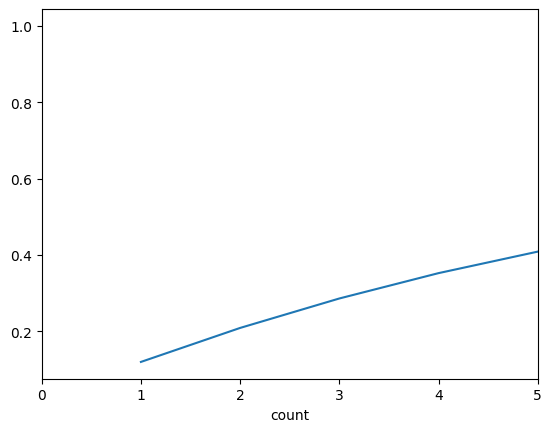

In [28]:
#How many NFT collections does each wallet own?

df_slugged = combined_df.drop_duplicates(subset=['slug','address'])
val_counts = df_slugged['address'].value_counts()
#plot cdf of val counts
cdf = val_counts.value_counts(normalize=True).sort_index().cumsum()
cdf.plot()
plt.xlim(0,5)
plt.show()

In [25]:
look_sims_dict 

{'0n1-force': ['neotokyopunkscollabs',
  'vainego',
  'mekazuki',
  'roars-by-ntp',
  'tokyo-brave-heroes',
  'skullzuki',
  'dreamzukinft',
  'tokyobraveheroes2g',
  '0xvampire-project',
  'ssa-international',
  'ryokoclub',
  'skull-elementals',
  '0xzuki',
  '0xhunter'],
 '3landers': ['frnds-club',
  'the-pepe-chimpsons',
  'toonsquad-official',
  'the-chimpsons-official',
  'we-the-kids',
  'colorful-ape-club-official',
  'pastel-cronies',
  'theapefrens',
  'voiceverse-genesis',
  'apemaniasocialclub',
  'mobs-and-aliens',
  'theapesonsclub',
  'sodativity',
  'gemapeclubnft',
  'zoodlers',
  'internetfrens',
  'the-scornables',
  'yungapesquad',
  'elfooznfts',
  'pndnft',
  'springfieldapesnft',
  'the-chimpsons-pets',
  'hoodles-official',
  'goodmonkeyz',
  'make-it-legal-2',
  'mfn-gutter-punks',
  'metaflexer',
  'small-graffiti',
  'momoape-club',
  'riotgirls',
  'true-plebs',
  'coolapeclubofficial',
  'partysheepclub',
  'phunkydoodles',
  'proof-of-monke',
  'loser-club

In [57]:
df_slugged = combined_df.query('slug == "world-of-women-galaxy"')
df_slugged_address = df_slugged['address'].unique()
df_look_sim = combined_df.query('address in @df_slugged_address and (slug in @look_sims_dict["world-of-women-galaxy"] or slug == "world-of-women-galaxy") and slug not in @ll_ders')
df_look_sim['slug'].value_counts()

slug
world-of-women-nft           6457
womenrise                    1810
rebelsociety                  701
women-from-venus              594
ethalien                      198
death-girl-official           147
asian-identity-collection     128
soul-cafe-collectibles         76
ahegao-nft-official            39
thenormies                      1
Name: count, dtype: int64

In [78]:
cfo.get_ownership_stats_no_db(combined_df,'milady',der_lists,look_sims_dict)

(0.036301326394618263,
 0.030969675131331906,
 0.0014577259475218659,
 24.90270990670813,
 21.245197140093687)

In [80]:
results = []
for top_slug in top_slugs:
    print(top_slug)
    results.append((top_slug,*cfo.get_ownership_stats_no_db(combined_df,top_slug,der_lists,look_sims_dict)))
result_df = pd.DataFrame(results,columns=['slug','Percent Tokens','Percent Collections','Expected Percent','Token Ratio','Collection Ratio'])
result_df

0n1-force
3landers
alienfrensnft
azuki
beanzofficial
bears-deluxe
boredapeyachtclub
chain-runners-nft
clonex
cool-cats-nft
coolmans-universe
cryptodickbutts-s3
cryptopunks
degentoonz-collection
doodles-official
forgottenruneswizardscult
genuine-undead
goblintownwtf
guttercatgang
hashmasks
kaiju-kingz
kanpai-pandas
karafuru
killergf
kiwami-genesis
kprverse
lilpudgys
livesofasuna
metahero-generative
mfers
milady
moonbirds-oddities
muribyfabrik
mutant-ape-yacht-club
nakamigos
official-v1-punks
phantabear
proof-moonbirds
pudgypenguins
pxnghostdivision
rare-apepes
remilio-babies
sappy-seals
sneaky-vampire-syndicate
supducks
the-crypto-chicks
thepotatoz
theshiboshis
tubby-cats
veefriends
veefriends-series-2
wonderpals
world-of-women-galaxy
world-of-women-nft


,slug,Percent Tokens,Percent Collections,Expected Percent,Token Ratio,Collection Ratio
0,0n1-force,0.000947,0.001525,0.001276,0.742187,1.195292
1,3landers,0.004401,0.010023,0.005011,0.878275,2.000230
2,alienfrensnft,0.019191,0.019551,0.003280,5.851146,5.960784
3,azuki,0.023916,0.015752,0.008929,2.678646,1.764242
4,beanzofficial,0.001584,0.001104,0.001276,1.242140,0.865465
5,bears-deluxe,0.000251,0.000142,0.000456,0.550247,0.312188
6,boredapeyachtclub,0.008161,0.005307,0.007653,1.066319,0.693456
7,chain-runners-nft,0.004235,0.003800,0.000911,4.647826,4.170831
8,clonex,0.002951,0.003280,0.001913,1.542507,1.714147
9,cool-cats-nft,0.018162,0.019613,0.006013,3.020313,3.261776


In [85]:
result_df['Collection Ratio'].describe()

count    54.000000
mean      3.913222
std       5.482278
min       0.312188
25%       1.465164
50%       2.057819
75%       4.104582
max      31.306328
Name: Collection Ratio, dtype: float64